In [24]:
%matplotlib inline
from galaxy_analysis.plot.plot_styles import *
import yt
from galaxy_analysis.analysis import Galaxy
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from mpl_toolkits.axes_grid1 import AxesGrid
from yt.visualization.base_plot_types import get_multi_plot
import matplotlib.colorbar as cb
from matplotlib.colors import LogNorm

In [4]:
def _ion_fraction(field, data):
    return data['H_p1_fraction'] / (data['H_p0_fraction'] + data['H_p1_fraction'])
def _neutral_fraction(field,data):
    return data['H_p0_fraction'] / (data['H_p0_fraction'] + data['H_p1_fraction'])

yt.add_field(("gas","ion_fraction"), function=_ion_fraction, units='')
yt.add_field(("gas","neutral_fraction"), function = _neutral_fraction, units = '')

In [ ]:
workdir = '/home/aemerick/work/enzo_runs/'
dsname = 'DD0142'

datasets = OrderedDict()
datasets['Fiducial'] = Galaxy(dsname,wdir=workdir + 'sn_H2atten_H2sh/')
datasets['NoRT']     = Galaxy(dsname,wdir=workdir + 'sn_H2atten_H2_noion/')
datasets['Shortrad'] = Galaxy(dsname,wdir=workdir + 'sn_H2atten_H2_shortrad/')

In [64]:
def panel_plot(datasets = {}, fields = ['number_density','Temperature','ion_fraction'],
               width = (4, 'kpc'), annotate_particles = True, velocity = True,
               buff = 512, outname = 'radiation_panel.png'):
    
    
    cmaps = {'number_density' : 'viridis', 'Temperature' : 'RdYlBu_r',
             'ion_fraction' : 'plasma'}
    
    unit  = {'number_density' : 'cm**(-3)', 'Temperature' : 'K',
             'ion_fraction' : ''}
    
    zlim  = {'number_density' : (1.0E-3, 1.0E3), 'Temperature' : (100.0,1.0E7),
             'ion_fraction' :  (1.0E-4,1.0)}
    
    labels = {'number_density' : r'log(n [cm$^{-3}$])',
              'Temperature'     : r'log(T [K])',
              'ion_fraction'    : r'log(Ionization Fraction)'}
    
    fig, axes, colorbars = get_multi_plot(3, 3, colorbar='horizontal', bw = 4)

    for ax1 in axes:
        for ax2 in ax1:
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            
        
    all_plots = {}
    all_frb   = {}
    for k in datasets:
        all_plots[k] = yt.SlicePlot(datasets[k].ds, 'x', fields, width = width)
        all_plots[k].set_buff_size(buff)
        
        for field in fields:
            all_plots[k].set_cmap(field, cmaps[field])
            all_plots[k].set_unit(field, unit[field])
            all_plots[k].set_zlim(field, zlim[field][0], zlim[field][1])

        #if annotate_particles:
        #    all_plots[k].annotate_particles(0.9)
        #if velocity:
        #    all_plots[k].annotate_quiver('velocity_y', 'velocity_z', 16)
        
        
        all_frb[k] = all_plots[k].data_source.to_frb(width, buff)
        
    axi = axj = 0
    plots = [ [None,None,None], [None,None,None], [None,None,None] ]
    print np.shape(axes)
    for k in datasets:
        for field in fields:
            ax = axes[axi][axj]
            
            plot_data = np.array( all_frb[k][field] )
            
            plots[axi][axj] = ax.imshow(plot_data, origin = "lower", norm=LogNorm())
            plots[axi][axj].set_clim(zlim[field])
            plots[axi][axj].set_cmap(cmaps[field])
                  
            #for p, cax, t in zip(plots[0:6:2], colorbars, titles):
            if axi == 2:
                cbar = fig.colorbar(plots[axi][axj], cax=colorbars[axj], orientation='horizontal')
                cbar.set_label(labels[field])
                
            axj = axj + 1
            if axj >= 3:
                axj = 0
                axi = axi + 1

    
    #i = 0
    #for k in datasets:        
    #    for field in fields:
    #        plot = all_plots[k].plots[field]
    #        plot.figure = fig
    #        plot.axes = grid[i].axes
    #        #plot.cax = grid.cbar_axes[i]
    #        i = i + 1
    #    all_plots[k]._setup_plots()
        
    fig.savefig(outname)
    
    return fig

(3, 3)


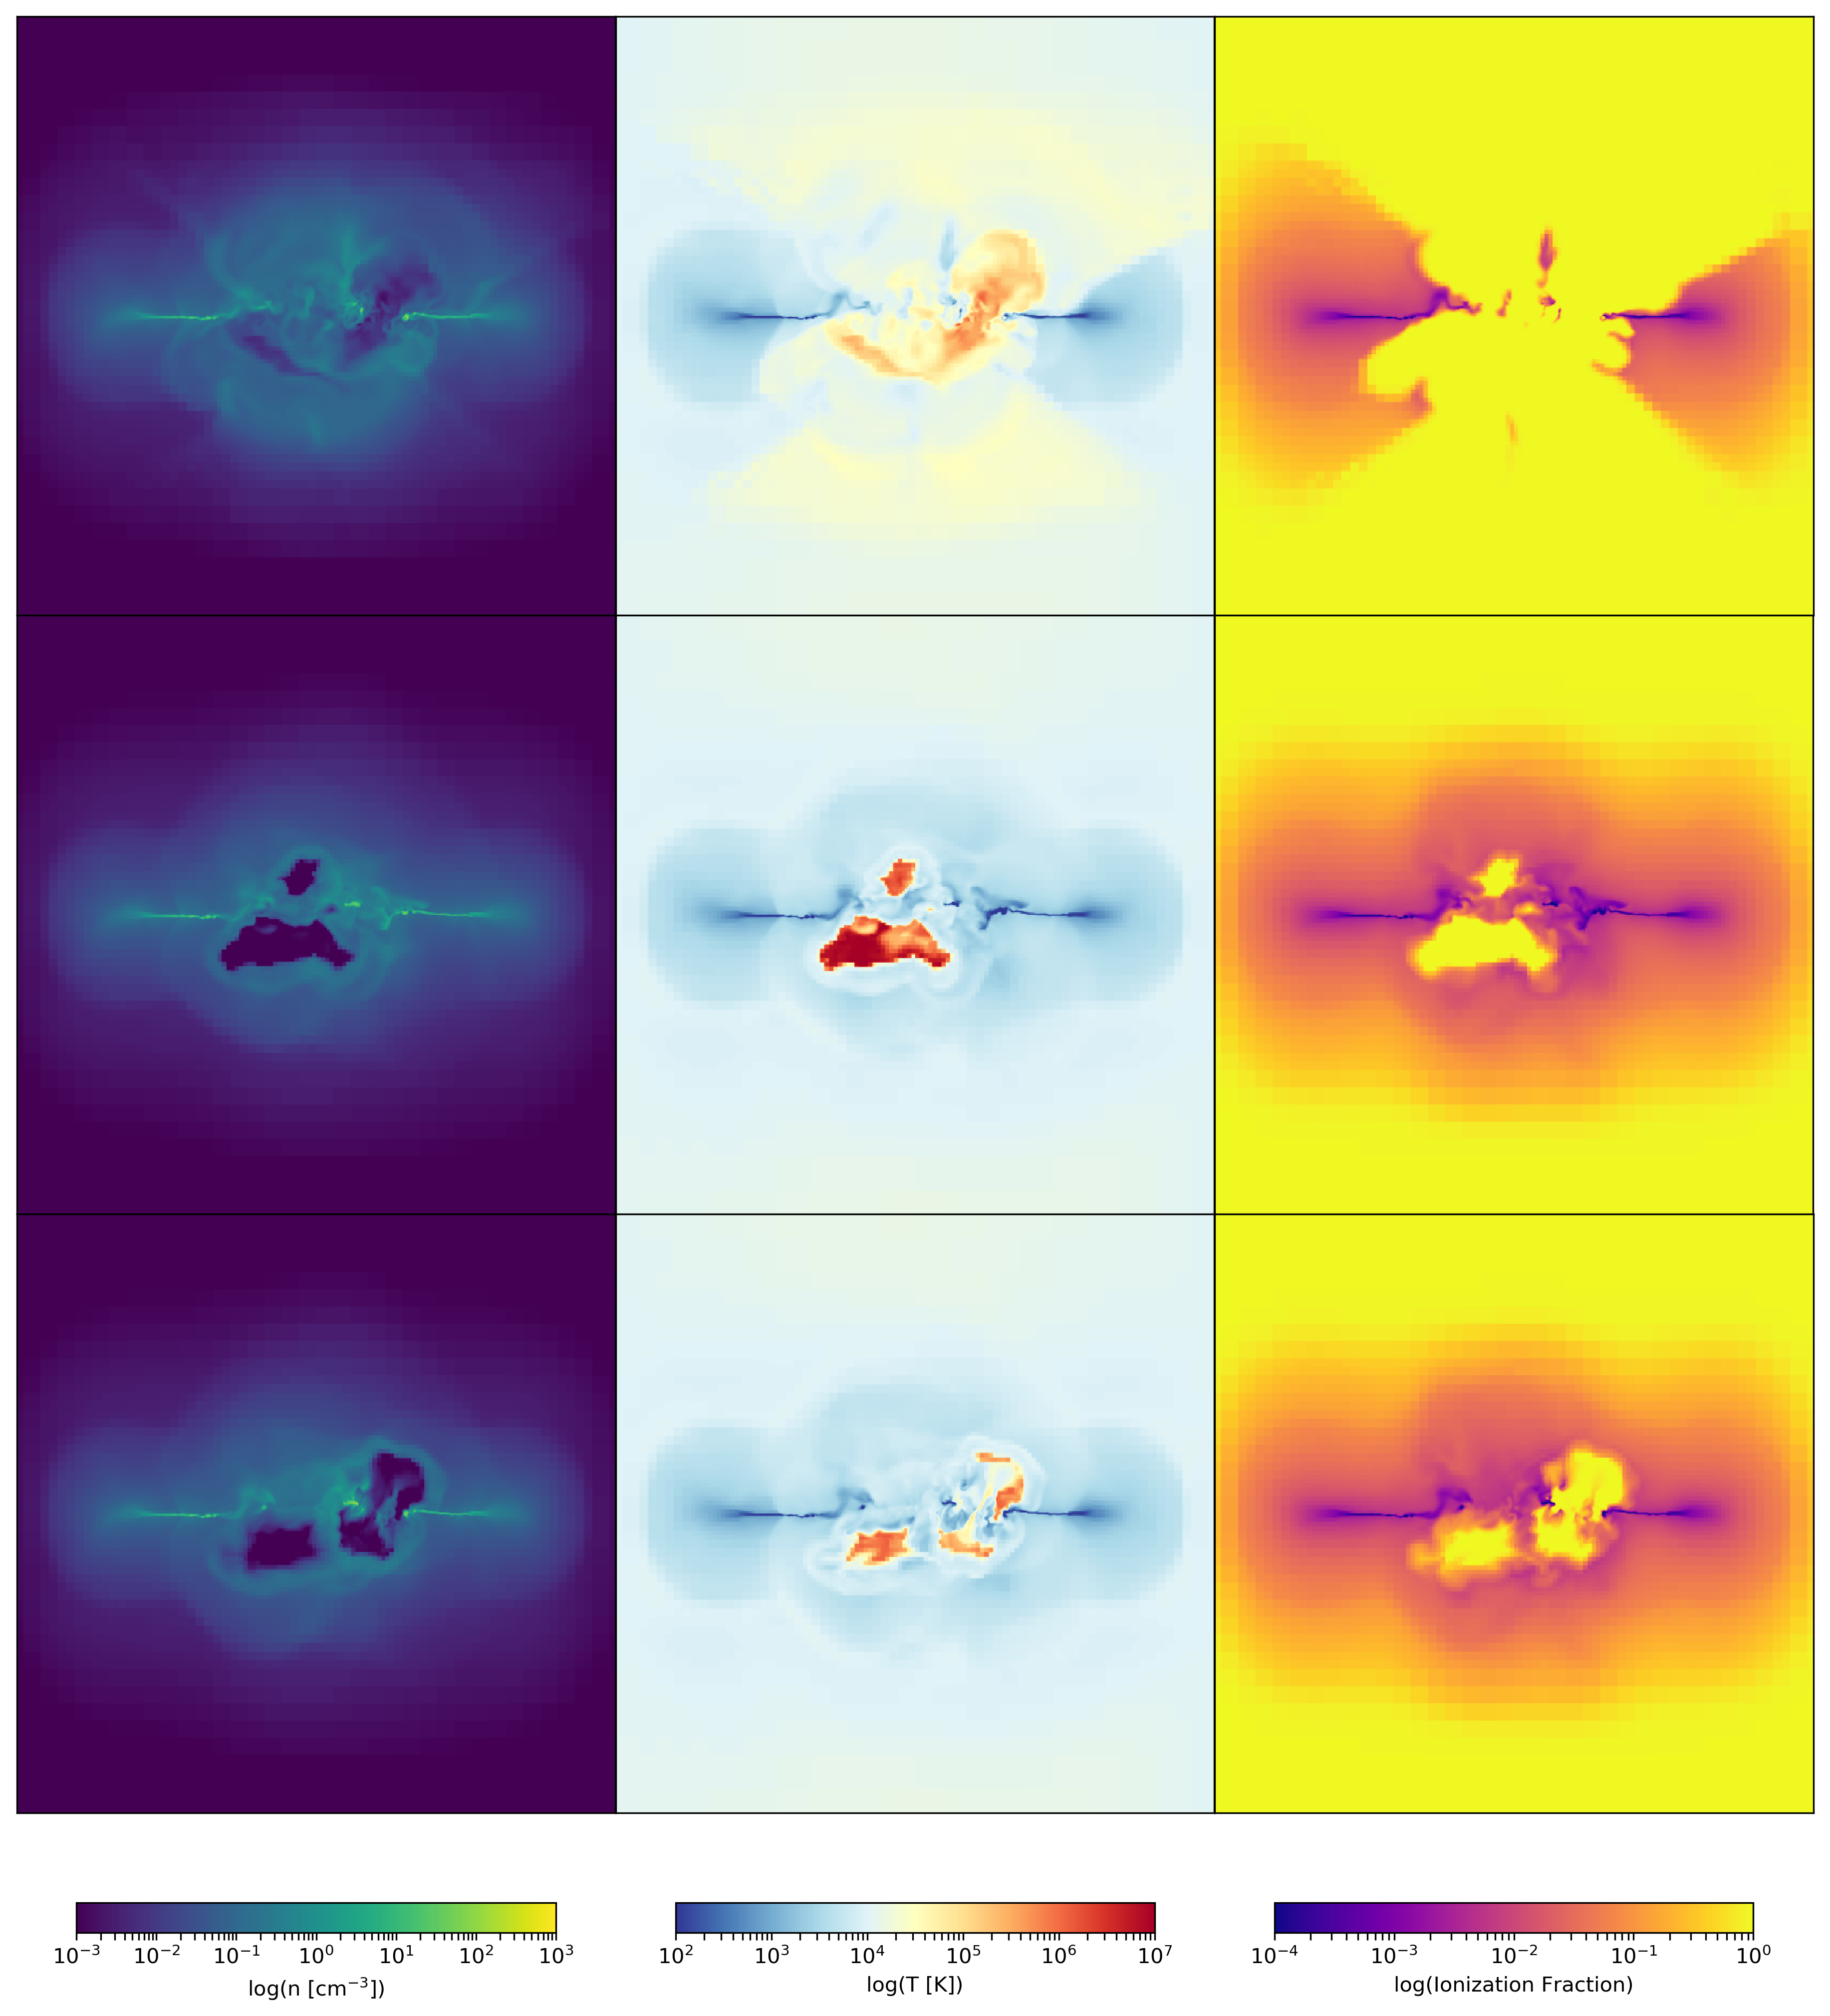

In [65]:
panel_plot(datasets = datasets, width = (2,'kpc'), outname = dsname + "_fiducial_shortrad_nort.png")

Parsing Hierarchy : 100%|██████████| 2638/2638 [00:00<00:00, 49704.07it/s]


(3, 3)


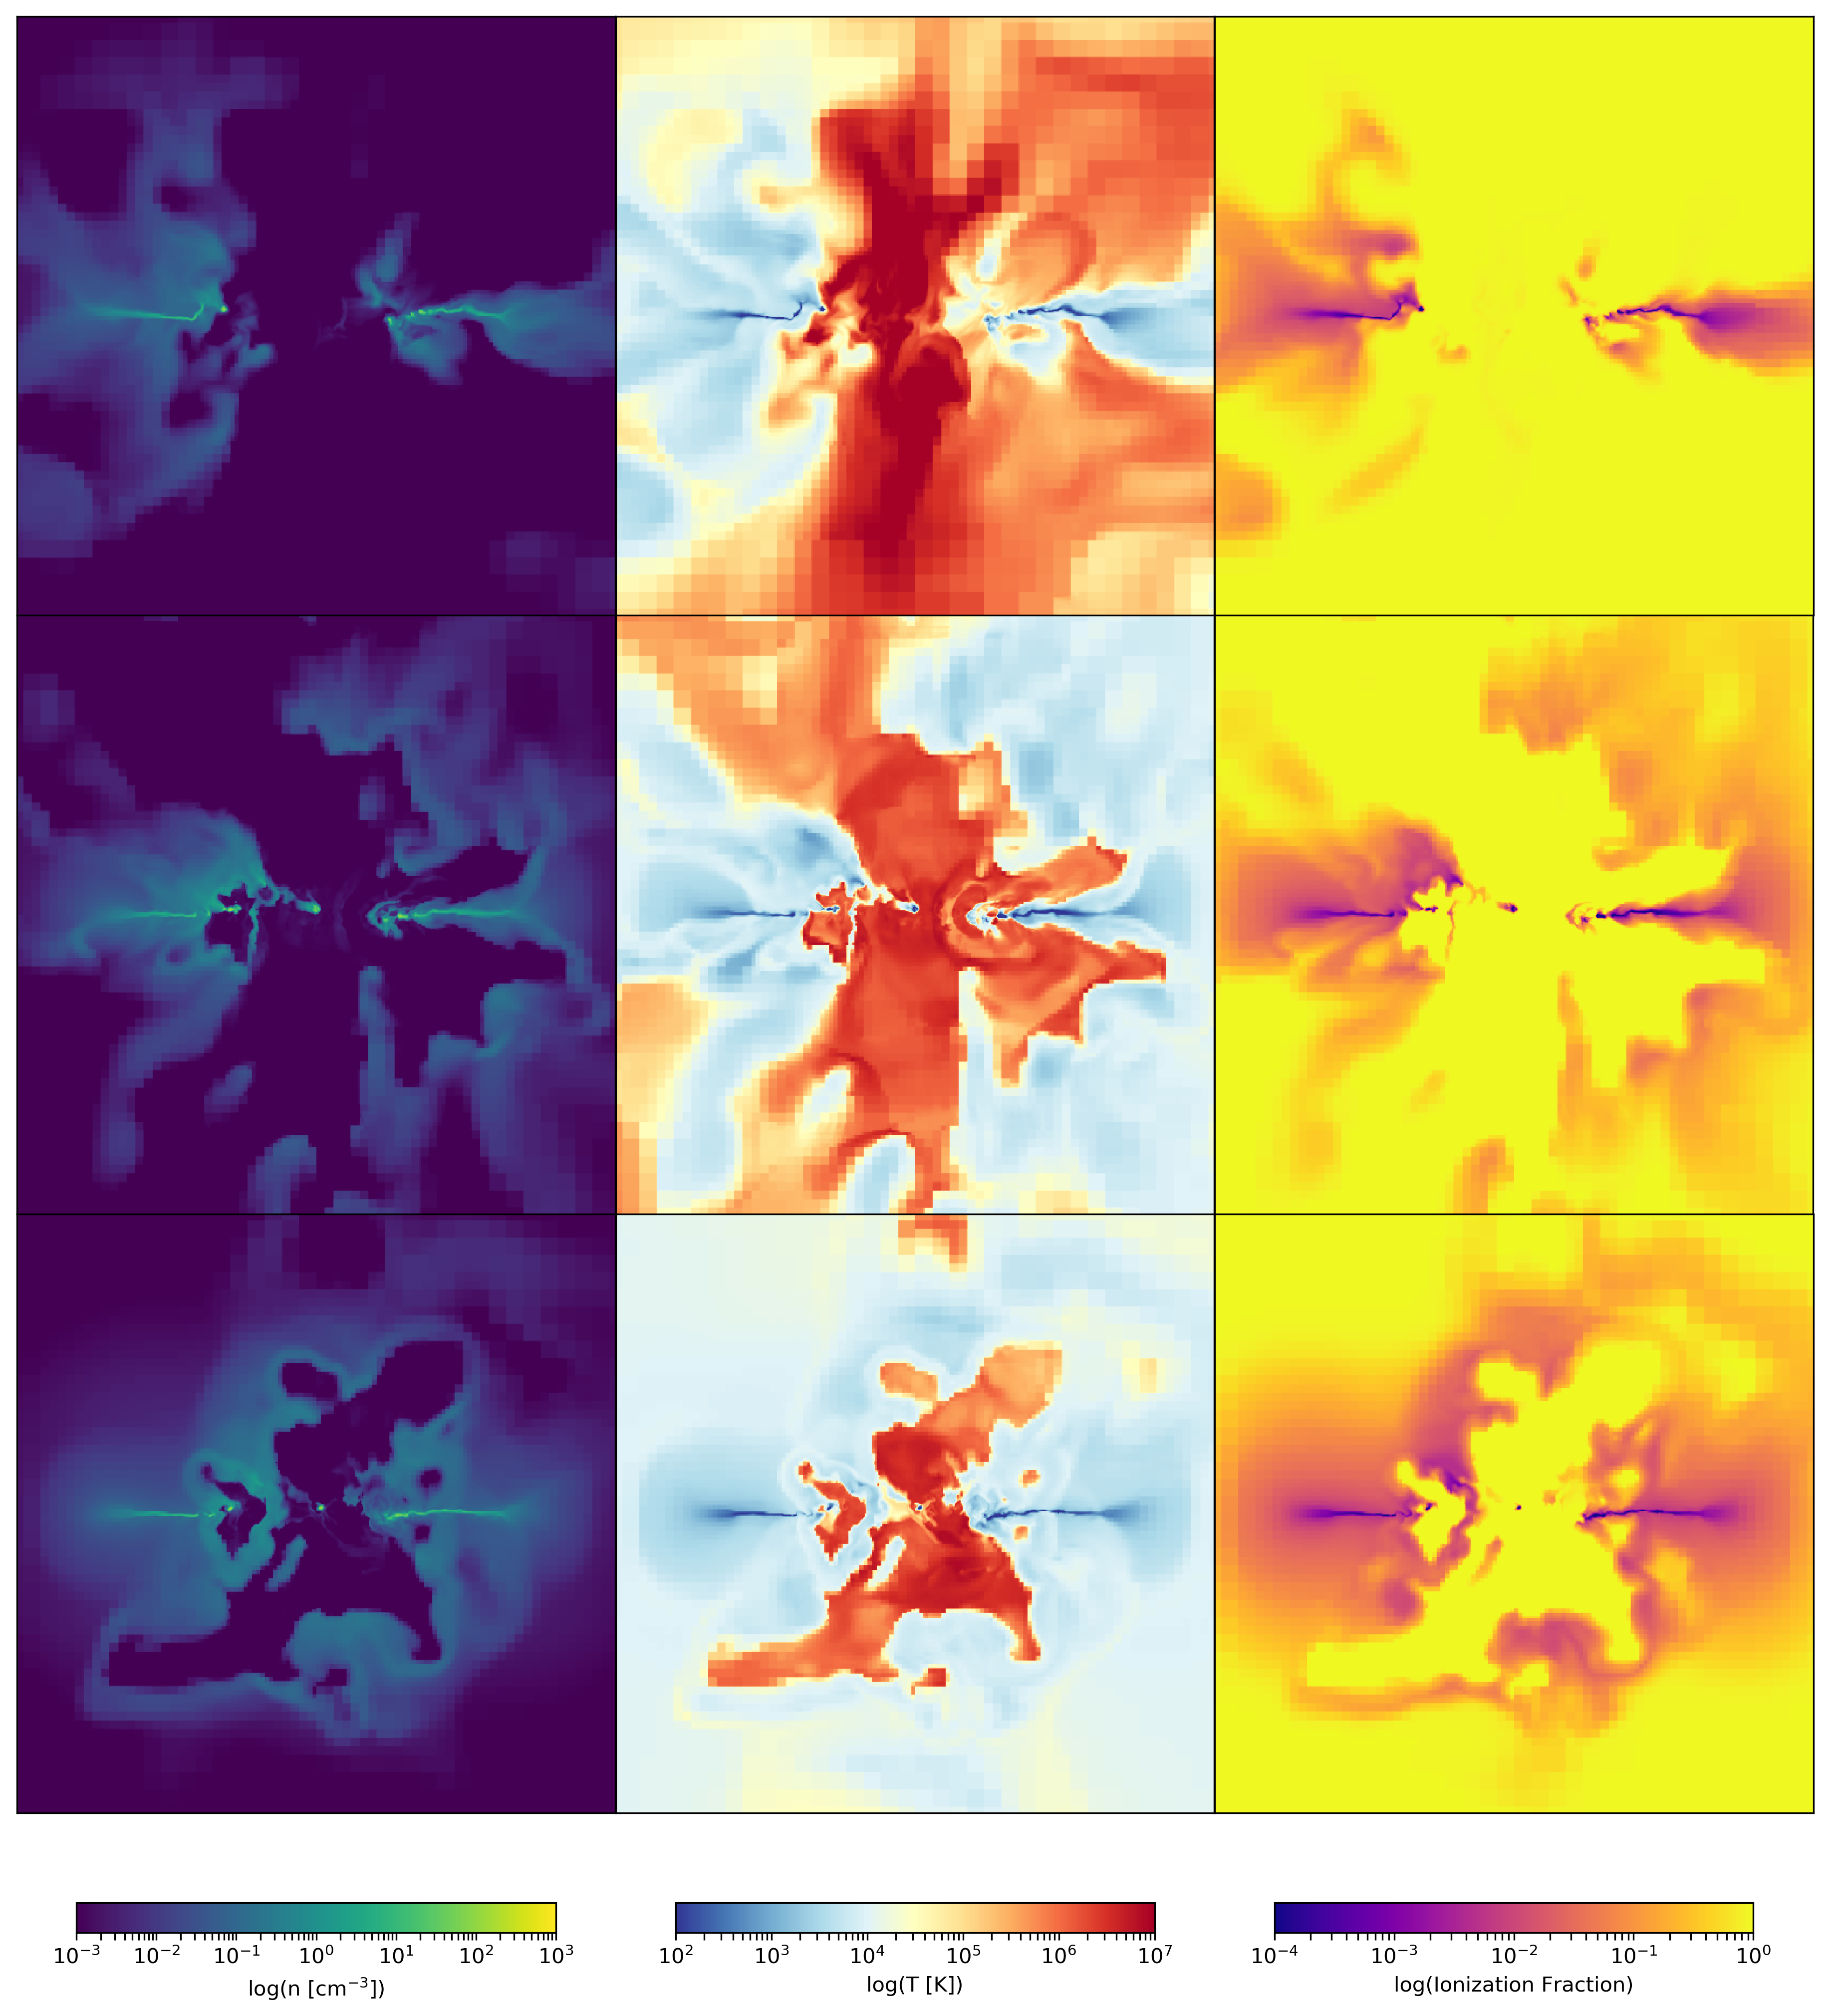

In [66]:
workdir = '/home/aemerick/work/enzo_runs/'
dsname = 'DD0172'

datasets = OrderedDict()
datasets['Fiducial'] = Galaxy(dsname,wdir=workdir + 'sn_H2atten_H2sh/')
datasets['NoRT']     = Galaxy(dsname,wdir=workdir + 'sn_H2atten_H2_noion/')
datasets['Shortrad'] = Galaxy(dsname,wdir=workdir + 'sn_H2atten_H2_shortrad/')

panel_plot(datasets = datasets, width = (2,'kpc'), outname = dsname + "_fiducial_shortrad_nort.png")